# Final Project (DS102 and DS104)

### Project Objective:

To determine and predict which type of resale HDB and area gives you the best rental yield. 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
%matplotlib inline

## Section 1 - Data preparation

In [2]:
resales_list = pd.read_csv("resale-flat-jan-2017-jan-2021.csv")
resales_list.head()
# upload and check to ensure that data is correctly uploaded

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


#### Dataset 1 - Datetime conversion
- Creation of "year" and "quarter" Column
- Creation of "remaining_lease_in_months" column

In [3]:
resales_list["month"] = pd.to_datetime(resales_list.month)
resales_list["year"] = resales_list.month.dt.year
resales_list["quarters"] = resales_list.month.dt.quarter

resales_list["remaining_lease"] = resales_list['remaining_lease'].str.replace('years', '')
resales_list["remaining_lease"] = resales_list['remaining_lease'].str.replace('month', '')
resales_list["remaining_lease"] = resales_list['remaining_lease'].str.replace('s', '')

resales_list[['lease_years','lease_months']] = resales_list['remaining_lease'].str.split(expand=True,)
resales_list['lease_years'] = pd.to_numeric(resales_list.lease_years)
resales_list['lease_months'] = pd.to_numeric(resales_list.lease_months)
resales_list['remaining_lease_in_months'] = resales_list.lease_years*12 + pd.notnull(resales_list.lease_months)

resales_list.head()
# checking the dataframe to ensure the codes runs as per intent. 

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,quarters,lease_years,lease_months,remaining_lease_in_months
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 04,232000.0,2017,1,61,4.0,733
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 07,250000.0,2017,1,60,7.0,721
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 05,262000.0,2017,1,62,5.0,745
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 01,265000.0,2017,1,62,1.0,745
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 05,265000.0,2017,1,62,5.0,745


#### Dataset 1 - overview

In [4]:
resales_list_overview = pd.DataFrame(resales_list.dtypes, columns = ["data_type"])
resales_list_overview["count"] = resales_list.count()
resales_list_overview["null_value"] = resales_list.isnull().sum()
resales_list_overview["min"] = resales_list.min()
resales_list_overview["max"] = resales_list.max()
resales_list_overview
# describe() is not comprehensive enough, hence I create my own table for sanity check

,data_type,count,null_value,min,max
month,datetime64[ns],90123,0,2017-01-01 00:00:00,2021-01-01 00:00:00
town,object,90123,0,ANG MO KIO,YISHUN
flat_type,object,90123,0,1 ROOM,MULTI-GENERATION
block,object,90123,0,1,9B
street_name,object,90123,0,ADMIRALTY DR,ZION RD
storey_range,object,90123,0,01 TO 03,49 TO 51
floor_area_sqm,float64,90123,0,31,249
flat_model,object,90123,0,2-room,Type S2
lease_commence_date,int64,90123,0,1966,2019
remaining_lease,object,90123,0,44 10,97 09


In [5]:
rent_list = pd.read_csv("median-rent-by-town-and-flat-type.csv")
rent_list.head()
# upload and check to ensure that data is correctly uploaded

,quarter,town,flat_type,median_rent
0,2005-Q2,ANG MO KIO,1-RM,na
1,2005-Q2,ANG MO KIO,2-RM,na
2,2005-Q2,ANG MO KIO,3-RM,800
3,2005-Q2,ANG MO KIO,4-RM,950
4,2005-Q2,ANG MO KIO,5-RM,-


#### Dataset 2 - Datetime conversion
- Creation of "year" and "quarter" Column

In [6]:
rent_list[['year','quarters']] = rent_list.quarter.str.split('-Q', expand=True)
rent_list['year'] = pd.to_numeric(rent_list.year)
rent_list['quarters'] = pd.to_numeric(rent_list.quarters)
rent_list.head()
# this is to create the common field and lay the foundation for the merge later on

,quarter,town,flat_type,median_rent,year,quarters
0,2005-Q2,ANG MO KIO,1-RM,na,2005,2
1,2005-Q2,ANG MO KIO,2-RM,na,2005,2
2,2005-Q2,ANG MO KIO,3-RM,800,2005,2
3,2005-Q2,ANG MO KIO,4-RM,950,2005,2
4,2005-Q2,ANG MO KIO,5-RM,-,2005,2


#### Dataset 2 - Checking and standardising for merge

- Standardising flat_type
- Data cleaning for median_rent

In [7]:
print ("dataset 1", resales_list.flat_type.unique())
print ("dataset 2", rent_list.flat_type.unique())
# checking the critical field 'flat_type' which will be used for the merger

dataset 1 ['2 ROOM' '3 ROOM' '4 ROOM' '5 ROOM' 'EXECUTIVE' '1 ROOM'
 'MULTI-GENERATION']
dataset 2 ['1-RM' '2-RM' '3-RM' '4-RM' '5-RM' 'EXEC']


In [8]:
rent_list["flat_type"] = rent_list['flat_type'].str.replace('1-RM', '1 ROOM')
rent_list["flat_type"] = rent_list['flat_type'].str.replace('2-RM', '2 ROOM')
rent_list["flat_type"] = rent_list['flat_type'].str.replace('3-RM', '3 ROOM')
rent_list["flat_type"] = rent_list['flat_type'].str.replace('4-RM', '4 ROOM')
rent_list["flat_type"] = rent_list['flat_type'].str.replace('5-RM', '5 ROOM')
rent_list["flat_type"] = rent_list['flat_type'].str.replace('EXE', 'EXECUTIVE')
rent_list.head()
# standardising the flat_type for dataset 2 to be similar to dataset 1
# changing on dataset 2 as there is less rows and columns and it is also the secondary dataset, with resale list being the primary dataset


,quarter,town,flat_type,median_rent,year,quarters
0,2005-Q2,ANG MO KIO,1 ROOM,na,2005,2
1,2005-Q2,ANG MO KIO,2 ROOM,na,2005,2
2,2005-Q2,ANG MO KIO,3 ROOM,800,2005,2
3,2005-Q2,ANG MO KIO,4 ROOM,950,2005,2
4,2005-Q2,ANG MO KIO,5 ROOM,-,2005,2


#### Dataset 2 - Preparing and changing "median_rent" into numbers for analysis

In [9]:
rent_list["median_rent"] = rent_list['median_rent'].str.replace('$', '')
rent_list["median_rent"] = rent_list['median_rent'].str.replace('na', '')
rent_list["median_rent"] = rent_list['median_rent'].str.replace('-', '')
rent_list["median_rent"] = rent_list['median_rent'].str.replace(',', '')
rent_list["median_rent"] = pd.to_numeric(rent_list.median_rent)
rent_list.head()

# data in the median_rent column is very dirty and needs cleaning
# first we remove all the irrelevant signs and characters 
# thereafter we change it into numeric so that it can be used for analysis later on
# using head() once again to double check dataset

,quarter,town,flat_type,median_rent,year,quarters
0,2005-Q2,ANG MO KIO,1 ROOM,NaN,2005,2
1,2005-Q2,ANG MO KIO,2 ROOM,NaN,2005,2
2,2005-Q2,ANG MO KIO,3 ROOM,800.0,2005,2
3,2005-Q2,ANG MO KIO,4 ROOM,950.0,2005,2
4,2005-Q2,ANG MO KIO,5 ROOM,NaN,2005,2


In [10]:
rent_list_overview = pd.DataFrame(rent_list.dtypes, columns = ["data_type"])
rent_list_overview["count"] = rent_list.count()
rent_list_overview["null_value"] = rent_list.isnull().sum()
rent_list_overview["min"] = rent_list.min()
rent_list_overview["max"] = rent_list.max()
rent_list_overview
# describe() is not comprehensive enough, hence I create my own table for sanity check

,data_type,count,null_value,min,max
quarter,object,9873,0,2005-Q2,2020-Q4
town,object,9873,0,ANG MO KIO,YISHUN
flat_type,object,9873,0,1 ROOM,EXECUTIVEC
median_rent,float64,4588,5285,700,3600
year,int64,9873,0,2005,2020
quarters,int64,9873,0,1,4


#### Final Database - Combining and finalising the dataset for analysis

In [11]:
interim_db = pd.merge(resales_list, rent_list, how='left', on=['town', 'flat_type', 'year', 'quarters'])
interim_db.describe()
# using describe() instead of a customised table as it is sufficient to check if the merge is done properly
# using this as interim dataset and I will create a smaller dataset with essential columns for analysis

,floor_area_sqm,lease_commence_date,resale_price,year,quarters,lease_years,lease_months,remaining_lease_in_months,median_rent
count,90123.000000,90123.000000,9.012300e+04,90123.000000,90123.000000,90123.000000,82823.000000,90123.000000,77220.000000
mean,97.757126,1994.384441,4.437462e+05,2018.620430,2.578232,74.296328,6.042066,892.474940,1961.577182
std,24.278614,13.023446,1.543814e+05,1.172954,1.111588,12.984779,3.167682,155.814069,268.185678
min,31.000000,1966.000000,1.400000e+05,2017.000000,1.000000,44.000000,0.000000,529.000000,1380.000000
25%,82.000000,1984.000000,3.320000e+05,2018.000000,2.000000,64.000000,3.000000,769.000000,1800.000000
50%,95.000000,1995.000000,4.138000e+05,2019.000000,3.000000,74.000000,6.000000,889.000000,1900.000000
75%,113.000000,2003.000000,5.200000e+05,2020.000000,4.000000,84.000000,9.000000,1009.000000,2100.000000
max,249.000000,2019.000000,1.258000e+06,2021.000000,4.000000,97.000000,11.000000,1165.000000,2950.000000


In [12]:
interim_db.head()
# checks

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,year,quarters,lease_years,lease_months,remaining_lease_in_months,quarter,median_rent
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 04,232000.0,2017,1,61,4.0,733,2017-Q1,NaN
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 07,250000.0,2017,1,60,7.0,721,2017-Q1,1750.0
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 05,262000.0,2017,1,62,5.0,745,2017-Q1,1750.0
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 01,265000.0,2017,1,62,1.0,745,2017-Q1,1750.0
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 05,265000.0,2017,1,62,5.0,745,2017-Q1,1750.0


#### Creating new columns
- Creation of "annualised_yield" and "lifetime_yield" Column
- Creation of "lease_adjusted_annual_value" column

In [13]:
rent_resale_final = interim_db[['year','quarters','town','flat_type','storey_range','floor_area_sqm','flat_model','lease_commence_date','remaining_lease_in_months','resale_price','median_rent']]
rent_resale_final['annualised_yield'] = rent_resale_final['median_rent'] * 12 / rent_resale_final['resale_price']
rent_resale_final['lifetime_yield'] = rent_resale_final['median_rent'] / rent_resale_final['resale_price'] * rent_resale_final['remaining_lease_in_months']
rent_resale_final['lease_adjusted_annual_value'] = round(rent_resale_final['resale_price'] / rent_resale_final['remaining_lease_in_months'] * 12, 2)
rent_resale_final.head()

# creation of new columns which is important for analysis later on

<ipython-input-13-19d204436e47>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_resale_final['annualised_yield'] = rent_resale_final['median_rent'] * 12 / rent_resale_final['resale_price']
<ipython-input-13-19d204436e47>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rent_resale_final['lifetime_yield'] = rent_resale_final['median_rent'] / rent_resale_final['resale_price'] * rent_resale_final['remaining_lease_in_months']
<ipython-input-13-19d204436e47>:4: SettingWithCopyWarning: 
A value is trying to

,year,quarters,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease_in_months,resale_price,median_rent,annualised_yield,lifetime_yield,lease_adjusted_annual_value
0,2017,1,ANG MO KIO,2 ROOM,10 TO 12,44.0,Improved,1979,733,232000.0,NaN,NaN,NaN,3798.09
1,2017,1,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1978,721,250000.0,1750.0,0.084000,5.047000,4160.89
2,2017,1,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1980,745,262000.0,1750.0,0.080153,4.976145,4220.13
3,2017,1,ANG MO KIO,3 ROOM,04 TO 06,68.0,New Generation,1980,745,265000.0,1750.0,0.079245,4.919811,4268.46
4,2017,1,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1980,745,265000.0,1750.0,0.079245,4.919811,4268.46


In [14]:
rent_resale_final_overview = pd.DataFrame(rent_resale_final.dtypes, columns = ["data_type"])
rent_resale_final_overview["count"] = rent_resale_final.count()
rent_resale_final_overview["null_value"] = rent_resale_final.isnull().sum()
rent_resale_final_overview["min"] = rent_resale_final.min()
rent_resale_final_overview["max"] = rent_resale_final.max()
rent_resale_final_overview
# doing a more comprehensive check as this is the final dataframe to be used

,data_type,count,null_value,min,max
year,int64,90123,0,2017,2021
quarters,int64,90123,0,1,4
town,object,90123,0,ANG MO KIO,YISHUN
flat_type,object,90123,0,1 ROOM,MULTI-GENERATION
storey_range,object,90123,0,01 TO 03,49 TO 51
floor_area_sqm,float64,90123,0,31,249
flat_model,object,90123,0,2-room,Type S2
lease_commence_date,int64,90123,0,1966,2019
remaining_lease_in_months,int64,90123,0,529,1165
resale_price,float64,90123,0,140000,1.258e+06


## Section 2 - Data exploration and analysis

The final dataset contains 14 columns and 90,123 rows. Column description as below

| Column Name | Data Type | Description | 
| --- | --- | :- | 
| year | int64 | The year which the transaction takes place |
| quarters | int64 | The quarter which the transaction takes place |
| town | object | The town which the flat resides in |
| flat_type | object | The type of flats |
| storey_range | object | The storey range in which the flat belongs to |
| floor_area_sqm | float64 | The total floor area in square meter |
| flat_model | object | The detailed model of the flat |
| lease_commence_date | int64 | The year in which the lease commerences |
| remaining_lease_in_months | int64 | The lease left for the flat in months |
| resale_price | float64 | The transaction price of the flat |
| median_rent | float64 | The median rent of the of the same type of property in the same town at the point of sale |
| annualised_yield | float64 | Annualised yield based off median rent and resale price at the point of sale |
| lifetime_yield | float64 | Lifetime yield based off median rent, resale price and remaining lease at the point of sale |
| lease_adjusted_annual_value | float64 | Resale price divided by remaining lease in months then multiply by 12 to get annual value |

#### 1) Is there any area with high density of high/low priced HDB?

In [15]:
rent_resale_final_top_sorted = rent_resale_final.sort_values(by ='resale_price', ascending = False)
rent_resale_final_top_sorted.head()
# initial data exploration so start with something simple
# sorting the value so that the table/charts will look nice later on

,year,quarters,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease_in_months,resale_price,median_rent,annualised_yield,lifetime_yield,lease_adjusted_annual_value
78466,2020,3,CENTRAL AREA,5 ROOM,43 TO 45,107.0,Type S2,2011,1069,1258000.0,NaN,NaN,NaN,14121.61
83340,2020,4,CENTRAL AREA,5 ROOM,49 TO 51,105.0,Type S2,2011,1069,1248000.0,NaN,NaN,NaN,14009.35
68305,2020,1,CENTRAL AREA,5 ROOM,40 TO 42,107.0,Type S2,2011,1069,1232000.0,NaN,NaN,NaN,13829.75
85402,2020,4,BISHAN,5 ROOM,25 TO 27,120.0,DBSS,2011,1069,1218888.0,2600.0,0.025597,2.280275,13682.56
87908,2021,1,BISHAN,5 ROOM,25 TO 27,120.0,DBSS,2011,1069,1210000.0,NaN,NaN,NaN,13582.79


In [16]:
rent_resale_final.flat_model.value_counts()
# Checking what caused the high range of the resale value
# from here we can see that there us actually a lot of different flat models, it is not as standardised as what we initially thought

Model A                   29432
Improved                  22567
New Generation            12199
Premium Apartment          9875
Simplified                 3694
Apartment                  3688
Maisonette                 2723
Standard                   2546
DBSS                       1556
Model A2                   1129
Adjoined flat               171
Model A-Maisonette          154
Type S1                     142
Type S2                      86
Terrace                      54
Multi Generation             42
Premium Apartment Loft       36
Improved-Maisonette          15
Premium Maisonette           10
2-room                        4
Name: flat_model, dtype: int64

In [17]:
print ("10% of the dataset is", round(90123 *0.1,0), "records")
# we will be using the top/bot 10% for this part of the analysis 
# to removes the biasness between areas with high/low transaction volume

10% of the dataset is 9012.0 records


<AxesSubplot:xlabel='Town', ylabel='No. of Transactions'>

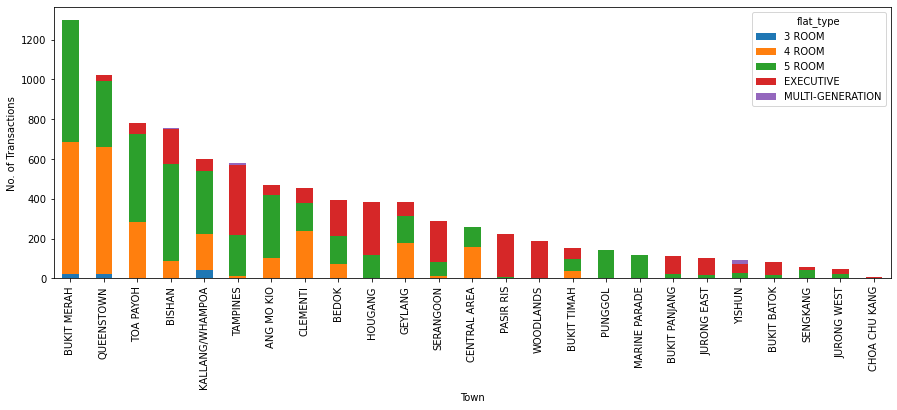

In [18]:
top_10_percent = rent_resale_final_top_sorted.head(9012).groupby(["town", "flat_type"])["resale_price"].count().unstack('flat_type').fillna(0)
top_10_percent['total'] = top_10_percent['3 ROOM'] + top_10_percent['4 ROOM'] + top_10_percent['5 ROOM'] + top_10_percent['EXECUTIVE'] + top_10_percent['MULTI-GENERATION']
top_10_percent = top_10_percent.sort_values(by ='total', ascending = False)
top_10_percent[['3 ROOM','4 ROOM','5 ROOM','EXECUTIVE','MULTI-GENERATION']].plot(kind='bar', stacked=True, figsize = (15, 5), xlabel = "Town", ylabel = "No. of Transactions")

# not adding 1 ROOM and 2 ROOM as none qualify for top 10%

In [19]:
top_10_percent.head(5)
# top 5 town accounts for 4,462 records or 49.5% of top 10% transactions

flat_type,3 ROOM,4 ROOM,5 ROOM,EXECUTIVE,MULTI-GENERATION,total
town,,,,,,
BUKIT MERAH,20.0,665.0,616.0,0.0,0.0,1301.0
QUEENSTOWN,21.0,639.0,333.0,30.0,0.0,1023.0
TOA PAYOH,0.0,283.0,441.0,59.0,0.0,783.0
BISHAN,0.0,89.0,485.0,176.0,6.0,756.0
KALLANG/WHAMPOA,42.0,180.0,319.0,58.0,0.0,599.0


<AxesSubplot:xlabel='Town', ylabel='No. of Transactions'>

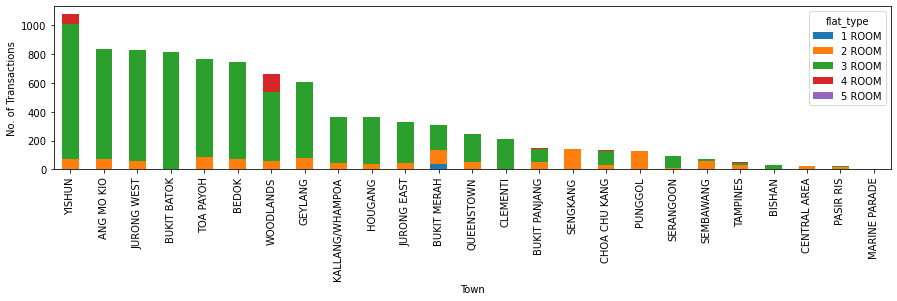

In [107]:

rent_resale_final_bot_sorted = rent_resale_final.sort_values(by ='resale_price', ascending = True)
bot_10_percent = rent_resale_final_bot_sorted.head(9012).groupby(["town", "flat_type"])["resale_price"].count().unstack('flat_type').fillna(0)
bot_10_percent['total'] = bot_10_percent['1 ROOM'] + bot_10_percent['2 ROOM'] + bot_10_percent['3 ROOM'] + bot_10_percent['4 ROOM'] + bot_10_percent['5 ROOM']
bot_10_percent = bot_10_percent.sort_values(by ='total', ascending = False)
bot_10_percent[['1 ROOM', '2 ROOM', '3 ROOM','4 ROOM','5 ROOM']].plot(kind='bar', stacked=True, xlabel = "Town", figsize = (15, 3), ylabel = "No. of Transactions")
# removing EXECUTIVE and Multi-generation flat type as none qualify in the bottom 10


In [21]:
bot_10_percent.head(5)
# bot 5 town accounts for 4,331 records or 48.1% of the bottom 10% transactions

flat_type,1 ROOM,2 ROOM,3 ROOM,4 ROOM,5 ROOM,total
town,,,,,,
YISHUN,0.0,75.0,932.0,72.0,0.0,1079.0
ANG MO KIO,0.0,71.0,763.0,1.0,0.0,835.0
JURONG WEST,0.0,59.0,771.0,0.0,0.0,830.0
BUKIT BATOK,0.0,0.0,816.0,3.0,0.0,819.0
TOA PAYOH,0.0,87.0,680.0,1.0,0.0,768.0


#### 2) Is there any meaningful trend on the lease-adjusted resale price? (Proposal Question 6)

In [22]:
rent_resale_final_top_sorted_adjusted = rent_resale_final.sort_values(by ='lease_adjusted_annual_value', ascending = False)
rent_resale_final_top_sorted_adjusted.head()
# sorting the data on a lease_adjusted_annual_value basis to remove the influence of remaining lease on the resale value

,year,quarters,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease_in_months,resale_price,median_rent,annualised_yield,lifetime_yield,lease_adjusted_annual_value
35776,2018,3,KALLANG/WHAMPOA,3 ROOM,01 TO 03,237.0,Terrace,1972,625,1185000.0,1900.0,0.019241,1.002110,22752.00
75849,2020,3,BUKIT MERAH,4 ROOM,04 TO 06,131.0,Adjoined flat,1973,613,1088000.0,2550.0,0.028125,1.436719,21298.53
79015,2020,3,KALLANG/WHAMPOA,3 ROOM,01 TO 03,170.0,Terrace,1972,601,1000000.0,1900.0,0.022800,1.141900,19966.72
19693,2017,4,KALLANG/WHAMPOA,3 ROOM,01 TO 03,249.0,Terrace,1972,637,1053888.0,1900.0,0.021634,1.148414,19853.46
81904,2020,4,QUEENSTOWN,4 ROOM,01 TO 03,131.0,Terrace,1968,565,928000.0,2700.0,0.034914,1.643858,19709.73


<AxesSubplot:xlabel='Town', ylabel='No. of Transactions'>

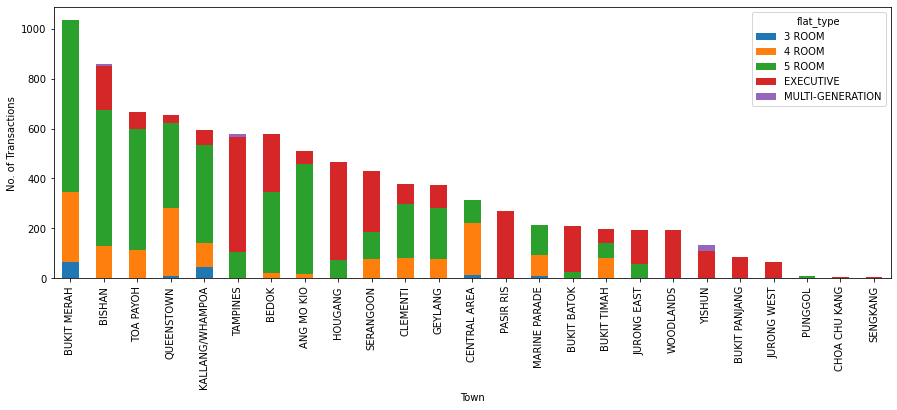

In [23]:
top_10_percent_adjusted = rent_resale_final_top_sorted_adjusted.head(9012).groupby(["town", "flat_type"])["lease_adjusted_annual_value"].count().unstack('flat_type').fillna(0)
top_10_percent_adjusted['total'] = top_10_percent_adjusted['3 ROOM'] + top_10_percent_adjusted['4 ROOM'] + top_10_percent_adjusted['5 ROOM'] + top_10_percent_adjusted['EXECUTIVE'] + top_10_percent_adjusted['MULTI-GENERATION']
top_10_percent_adjusted = top_10_percent_adjusted.sort_values(by ='total', ascending = False)
top_10_percent_adjusted[['3 ROOM','4 ROOM','5 ROOM','EXECUTIVE','MULTI-GENERATION']].plot(kind='bar', stacked=True, figsize = (15, 5), xlabel = "Town", ylabel = "No. of Transactions")

# not adding 1 ROOM and 2 ROOM as non qualify for top 10%

In [24]:
top_10_percent_adjusted.head(5)
# top 5 town accounts for 3,806 records or 42.2% of the top 10% transactions

flat_type,2 ROOM,3 ROOM,4 ROOM,5 ROOM,EXECUTIVE,MULTI-GENERATION,total
town,,,,,,,
BUKIT MERAH,2.0,66.0,278.0,692.0,0.0,0.0,1036.0
BISHAN,0.0,0.0,129.0,546.0,177.0,6.0,858.0
TOA PAYOH,0.0,0.0,113.0,486.0,67.0,0.0,666.0
QUEENSTOWN,0.0,11.0,271.0,341.0,30.0,0.0,653.0
KALLANG/WHAMPOA,0.0,47.0,94.0,391.0,61.0,0.0,593.0


<AxesSubplot:xlabel='Town', ylabel='No. of Transactions'>

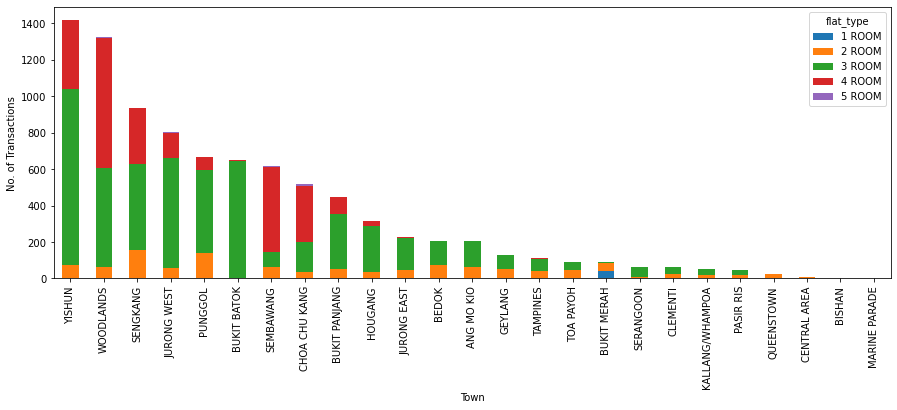

In [25]:
rent_resale_final_bot_sorted_adjusted = rent_resale_final.sort_values(by ='lease_adjusted_annual_value', ascending = True)
bot_10_percent_adjusted = rent_resale_final_bot_sorted_adjusted.head(9012).groupby(["town", "flat_type"])["lease_adjusted_annual_value"].count().unstack('flat_type').fillna(0)
bot_10_percent_adjusted['total'] = bot_10_percent_adjusted['1 ROOM'] + bot_10_percent_adjusted['2 ROOM'] + bot_10_percent_adjusted['3 ROOM'] + bot_10_percent_adjusted['4 ROOM'] + bot_10_percent_adjusted['5 ROOM']
bot_10_percent_adjusted = bot_10_percent_adjusted.sort_values(by ='total', ascending = False)
bot_10_percent_adjusted[['1 ROOM', '2 ROOM', '3 ROOM','4 ROOM','5 ROOM']].plot(kind='bar', stacked=True, figsize = (15, 5), xlabel = "Town", ylabel = "No. of Transactions")
# removing EXECUTIVE and Multi-generation flat type as none qualify in the bottom 10


In [26]:
bot_10_percent_adjusted.head(5)
# top 5 town accounts for 5,149 records or 57.1% of the bottom 10% transactions

flat_type,1 ROOM,2 ROOM,3 ROOM,4 ROOM,5 ROOM,total
town,,,,,,
YISHUN,0.0,75.0,962.0,383.0,0.0,1420.0
WOODLANDS,0.0,60.0,546.0,711.0,8.0,1325.0
SENGKANG,0.0,155.0,475.0,305.0,0.0,935.0
JURONG WEST,0.0,58.0,602.0,139.0,4.0,803.0
PUNGGOL,0.0,140.0,453.0,73.0,0.0,666.0


#### 3) Is there any meaningful trend on the median rental? (Proposal question 5)

In [27]:
rent_resale_final_rent_sorted = rent_resale_final.sort_values(by ='median_rent', ascending = False)
rent_resale_final_rent_sorted

,year,quarters,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease_in_months,resale_price,median_rent,annualised_yield,lifetime_yield,lease_adjusted_annual_value
5364,2017,2,QUEENSTOWN,5 ROOM,25 TO 27,113.0,Improved,2013,1140,960000.0,2950.0,0.036875,3.503125,10105.26
5361,2017,2,QUEENSTOWN,5 ROOM,13 TO 15,125.0,Improved,1997,949,885000.0,2950.0,0.040000,3.163333,11190.73
9106,2017,2,QUEENSTOWN,5 ROOM,01 TO 03,114.0,Standard,1977,697,600000.0,2950.0,0.059000,3.426917,10329.99
9107,2017,2,QUEENSTOWN,5 ROOM,01 TO 03,118.0,Adjoined flat,1974,661,755000.0,2950.0,0.046887,2.582715,13706.51
9108,2017,2,QUEENSTOWN,5 ROOM,07 TO 09,117.0,Standard,1978,709,800000.0,2950.0,0.044250,2.614437,13540.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90118,2021,1,YISHUN,EXECUTIVE,04 TO 06,146.0,Maisonette,1987,781,590000.0,NaN,NaN,NaN,9065.30
90119,2021,1,YISHUN,EXECUTIVE,10 TO 12,146.0,Maisonette,1986,769,588000.0,NaN,NaN,NaN,9175.55
90120,2021,1,YISHUN,EXECUTIVE,04 TO 06,142.0,Apartment,1988,792,670000.0,NaN,NaN,NaN,10151.52
90121,2021,1,YISHUN,EXECUTIVE,07 TO 09,142.0,Apartment,1987,781,690000.0,NaN,NaN,NaN,10601.79


[Text(0, 0.5, 'Median Rent'),
 Text(0.5, 0, 'Town'),
 Text(0.5, 1.0, 'Median Rent in 2020 by Town')]

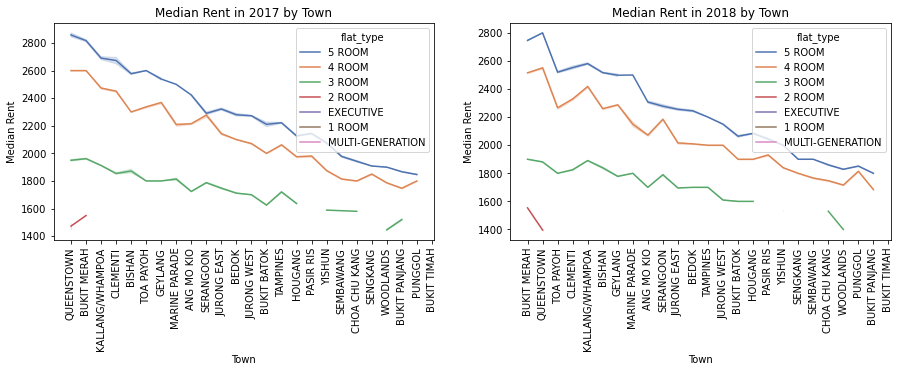

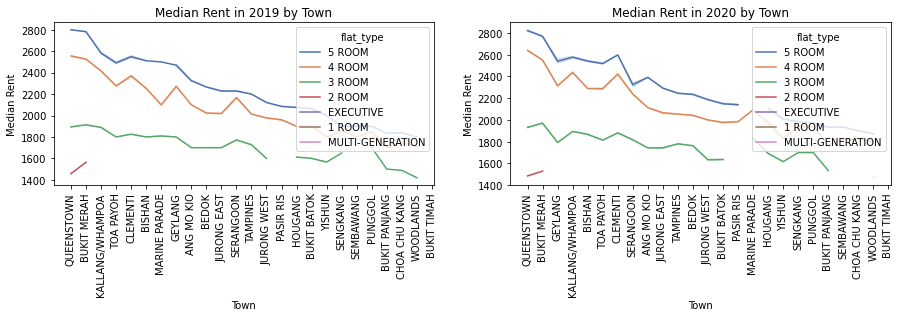

In [109]:
fig, ax = plot.subplots(nrows = 1, ncols = 2, figsize=(15,4))

rent_trend_2017 = rent_resale_final_rent_sorted[rent_resale_final_rent_sorted.year == 2017]
sns.lineplot(x = 'town', y='median_rent', hue='flat_type', data=rent_trend_2017, ax=ax[0], palette='deep')
for label in ax[0].get_xticklabels():
    label.set_rotation(90)
ax[0].set(ylabel ='Median Rent', xlabel='Town', title='Median Rent in 2017 by Town')

rent_trend_2018 = rent_resale_final_rent_sorted[rent_resale_final_rent_sorted.year == 2018]
sns.lineplot(x = 'town', y='median_rent', hue='flat_type', data=rent_trend_2018, ax=ax[1], palette='deep')
for label in ax[1].get_xticklabels():
    label.set_rotation(90)
ax[1].set(ylabel ='Median Rent', xlabel='Town', title='Median Rent in 2018 by Town')


fig, ax = plot.subplots(nrows = 1, ncols = 2, figsize=(15,3))

rent_trend_2019 = rent_resale_final_rent_sorted[rent_resale_final_rent_sorted.year == 2019]
sns.lineplot(x = 'town', y='median_rent', hue='flat_type', data=rent_trend_2019, ax=ax[0], palette='deep')
for label in ax[0].get_xticklabels():
    label.set_rotation(90)
ax[0].set(ylabel ='Median Rent', xlabel='Town', title='Median Rent in 2019 by Town')

rent_trend_2020 = rent_resale_final_rent_sorted[rent_resale_final_rent_sorted.year == 2020]
sns.lineplot(x = 'town', y='median_rent', hue='flat_type', data=rent_trend_2020 , ax=ax[1], palette='deep')
for label in ax[1].get_xticklabels():
    label.set_rotation(90)
ax[1].set(ylabel ='Median Rent', xlabel='Town', title='Median Rent in 2020 by Town')

#### 4) Is there any seasonal effect in prices and rental? (Proposal Question 2)

[Text(0, 0.5, 'Resale Price'),
 Text(0.5, 0, 'Quarter'),
 Text(0.5, 1.0, 'Lowest Transacted Price by Quarter'),
 (100000.0, 250000.0)]

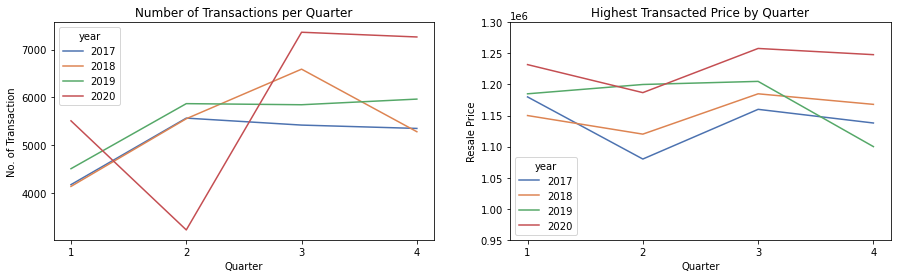

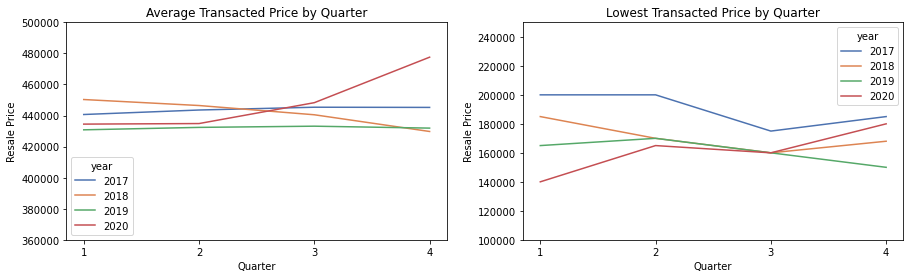

In [60]:
fig, ax = plot.subplots(nrows = 1, ncols = 2, figsize=(15,4))

season_effect_transactions = pd.DataFrame(rent_resale_final[rent_resale_final.year != 2021].groupby(["quarters", "year"])["resale_price"].count()).reset_index()
sns.lineplot(x = 'quarters', y='resale_price', hue='year', data=season_effect_transactions, ax=ax[0], palette='deep')
ax[0].set(ylabel ='No. of Transaction', xlabel='Quarter', xticks=(1,2,3,4), title='Number of Transactions per Quarter')

season_effect_high_prices = pd.DataFrame(rent_resale_final[rent_resale_final.year != 2021].groupby(["quarters", "year"])["resale_price"].max()).reset_index()
sns.lineplot(x = 'quarters', y='resale_price', hue='year', data=season_effect_high_prices, ax=ax[1], palette='deep')
ax[1].set(ylabel ='Resale Price', xlabel='Quarter', xticks=(1,2,3,4), title = 'Highest Transacted Price by Quarter', ylim=([950000,1300000]))


fig, ax = plot.subplots(nrows = 1, ncols = 2, figsize=(15,4))

season_effect_average_prices = pd.DataFrame(rent_resale_final[rent_resale_final.year != 2021].groupby(["quarters", "year"])["resale_price"].mean()).reset_index()
sns.lineplot(x = 'quarters', y='resale_price', hue='year', data=season_effect_average_prices, ax=ax[0], palette='deep')
ax[0].set(ylabel ='Resale Price', xlabel='Quarter', xticks=(1,2,3,4), title = 'Average Transacted Price by Quarter', ylim=([360000,500000]))

season_effect_low_prices = pd.DataFrame(rent_resale_final[rent_resale_final.year != 2021].groupby(["quarters", "year"])["resale_price"].min()).reset_index()
sns.lineplot(x = 'quarters', y='resale_price', hue='year', data=season_effect_low_prices, ax=ax[1], palette='deep')
ax[1].set(ylabel ='Resale Price', xlabel='Quarter', xticks=(1,2,3,4), title = 'Lowest Transacted Price by Quarter', ylim=([100000,250000]))

<AxesSubplot:xlabel='flat_type', ylabel='median_rent'>

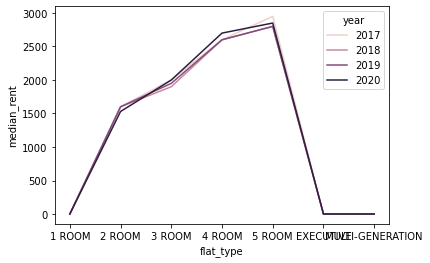

In [61]:
median_rent_flat_type = pd.DataFrame(rent_resale_final[rent_resale_final.year != 2021].groupby(['flat_type', 'year'])['median_rent'].max()).fillna(0).reset_index()
sns.lineplot(x = 'flat_type', y='median_rent', hue='year', data=median_rent_flat_type)
#plot median rental for each property type, each year to be 1 line
# drop 1 ROOM, EXECUTIVE and MULTI-GENERATION as the data is insignificant 


[Text(0, 0.5, 'Median Rent'),
 Text(0.5, 0, 'Quarter'),
 Text(0.5, 1.0, 'Median Rent of 5 ROOM Flat by Quarter')]

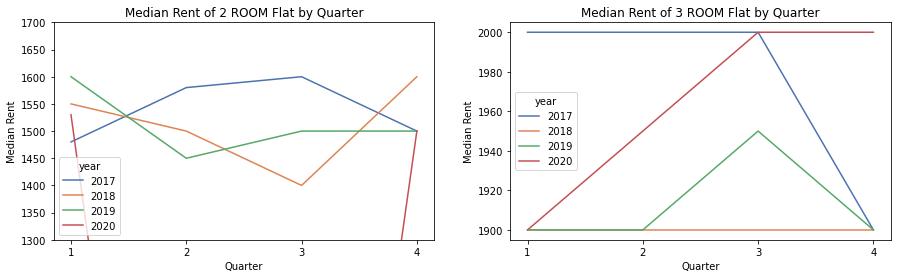

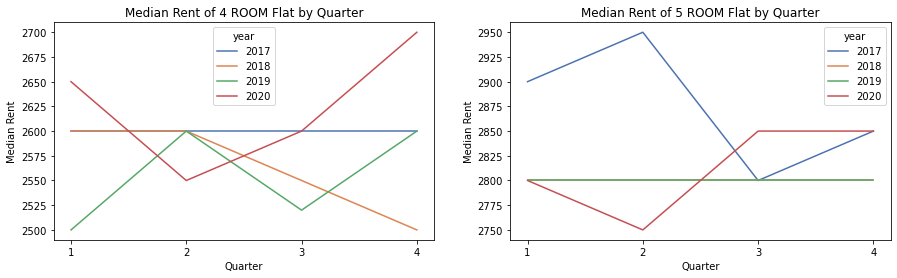

In [62]:
fig, ax = plot.subplots(nrows = 1, ncols = 2, figsize=(15,4))
median_rent_grouped = rent_resale_final[rent_resale_final.year != 2021].groupby(['flat_type', 'year', 'quarters'])['median_rent'].max().fillna(0).reset_index()

median_rent_2_room = pd.DataFrame(median_rent_grouped[median_rent_grouped.flat_type == '2 ROOM'])
sns.lineplot(x = 'quarters', y='median_rent', hue='year', data=median_rent_2_room, ax=ax[0], palette='deep')
ax[0].set(ylabel ='Median Rent', xlabel='Quarter', xticks=(1,2,3,4), title = 'Median Rent of 2 ROOM Flat by Quarter', ylim = (1300,1700))
#setting a y-limit as there is 0 value and it distort the graph

median_rent_3_room = pd.DataFrame(median_rent_grouped[median_rent_grouped.flat_type == '3 ROOM'])
sns.lineplot(x = 'quarters', y='median_rent', hue='year', data=median_rent_3_room, ax=ax[1], palette='deep')
ax[1].set(ylabel ='Median Rent', xlabel='Quarter', xticks=(1,2,3,4), title = 'Median Rent of 3 ROOM Flat by Quarter')


fig, ax = plot.subplots(nrows = 1, ncols = 2, figsize=(15,4))
# separate fig graph so that there is more space between the rows of graphs

median_rent_4_room = pd.DataFrame(median_rent_grouped[median_rent_grouped.flat_type == '4 ROOM'])
sns.lineplot(x = 'quarters', y='median_rent', hue='year', data=median_rent_4_room, ax=ax[0], palette='deep')
ax[0].set(ylabel ='Median Rent', xlabel='Quarter', xticks=(1,2,3,4), title = 'Median Rent of 4 ROOM Flat by Quarter')

median_rent_5_room = pd.DataFrame(median_rent_grouped[median_rent_grouped.flat_type == '5 ROOM'])
sns.lineplot(x = 'quarters', y='median_rent', hue='year', data=median_rent_5_room, ax=ax[1], palette='deep')
ax[1].set(ylabel ='Median Rent', xlabel='Quarter', xticks=(1,2,3,4), title = 'Median Rent of 5 ROOM Flat by Quarter')


#### 5) Is there any meaningful trend between resale price and storey range? (Proposal Question 3)

[Text(0, 0.5, 'Resale Price'),
 Text(0.5, 0, 'Storey Range'),
 Text(0.5, 1.0, 'Resale Price for EXECUTIVE Flat by Storey Range')]

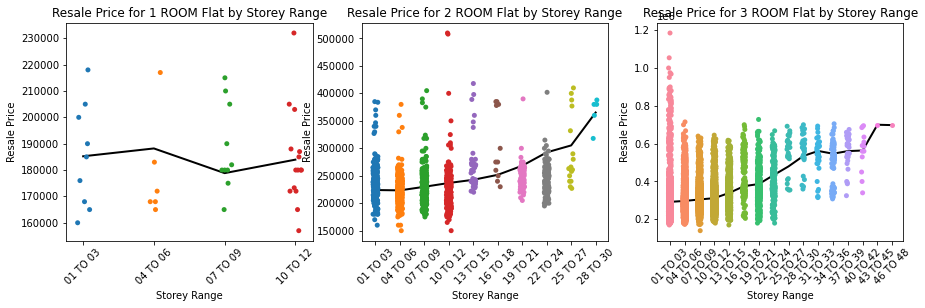

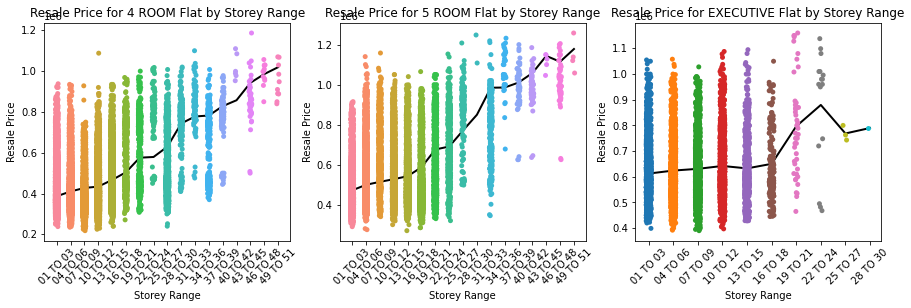

In [64]:
# using the resale price against storey range to see the camouflage trend

fig, ax = plot.subplots(nrows = 1, ncols = 3, figsize=(15,4))

storey_resale_price_1_room = rent_resale_final[rent_resale_final.flat_type == "1 ROOM"]
sns.stripplot(x="storey_range", y="resale_price", data=storey_resale_price_1_room, ax=ax[0])
storey_resale_price_1_room.groupby(['storey_range'])['resale_price'].mean().plot(ax=ax[0], color='black', linewidth=2)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[0].set(ylabel ='Resale Price', xlabel='Storey Range', title = 'Resale Price for 1 ROOM Flat by Storey Range')

storey_resale_price_2_room = rent_resale_final[rent_resale_final.flat_type == "2 ROOM"]
sns.stripplot(x="storey_range", y="resale_price", data=storey_resale_price_2_room, ax=ax[1])
storey_resale_price_2_room.groupby(['storey_range'])['resale_price'].mean().plot(ax=ax[1], color='black', linewidth=2)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].set(ylabel ='Resale Price', xlabel='Storey Range', title = 'Resale Price for 2 ROOM Flat by Storey Range')

storey_resale_price_3_room = rent_resale_final[rent_resale_final.flat_type == "3 ROOM"]
sns.stripplot(x="storey_range", y="resale_price", data=storey_resale_price_3_room, ax=ax[2])
storey_resale_price_3_room.groupby(['storey_range'])['resale_price'].mean().plot(ax=ax[2], color='black', linewidth=2)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45)
ax[2].set(ylabel ='Resale Price', xlabel='Storey Range', title = 'Resale Price for 3 ROOM Flat by Storey Range')


fig, ax = plot.subplots(nrows = 1, ncols = 3, figsize=(15,4))

storey_resale_price_4_room = rent_resale_final[rent_resale_final.flat_type == "4 ROOM"]
sns.stripplot(x="storey_range", y="resale_price", data=storey_resale_price_4_room, ax=ax[0])
storey_resale_price_4_room.groupby(['storey_range'])['resale_price'].mean().plot(ax=ax[0], color='black', linewidth=2)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[0].set(ylabel ='Resale Price', xlabel='Storey Range', title = 'Resale Price for 4 ROOM Flat by Storey Range')

storey_resale_price_5_room = rent_resale_final[rent_resale_final.flat_type == "5 ROOM"]
sns.stripplot(x="storey_range", y="resale_price", data=storey_resale_price_5_room, ax=ax[1])
storey_resale_price_5_room.groupby(['storey_range'])['resale_price'].mean().plot(ax=ax[1], color='black', linewidth=2)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].set(ylabel ='Resale Price', xlabel='Storey Range', title = 'Resale Price for 5 ROOM Flat by Storey Range')

storey_resale_price_executive = rent_resale_final[rent_resale_final.flat_type == "EXECUTIVE"]
sns.stripplot(x="storey_range", y="resale_price", data=storey_resale_price_executive, ax=ax[2])
storey_resale_price_executive.groupby(['storey_range'])['resale_price'].mean().plot(ax=ax[2], color='black', linewidth=2)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45)
ax[2].set(ylabel ='Resale Price', xlabel='Storey Range', title = 'Resale Price for EXECUTIVE Flat by Storey Range')


[Text(0, 0.5, 'Lease Adjusted Annual Price'),
 Text(0.5, 0, 'Storey Range'),
 Text(0.5, 1.0, 'Lease adjusted annual price for EXECUTIVE Flat')]

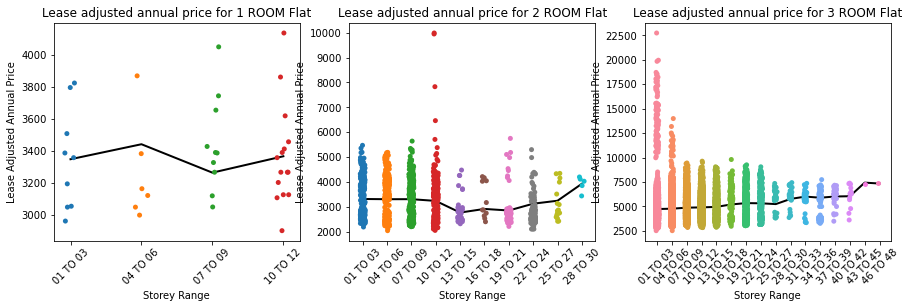

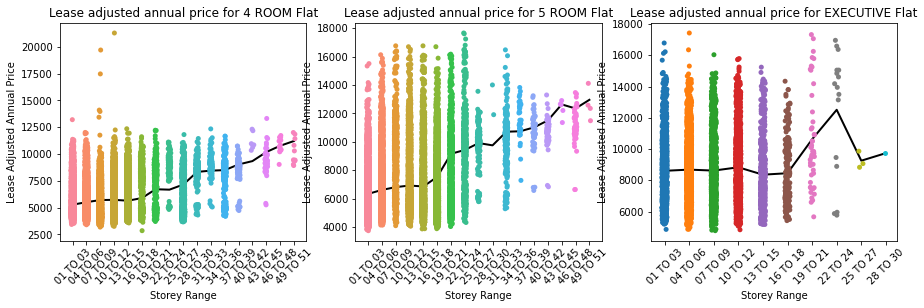

In [110]:
# using the lease adjusted annual value against storey range to see the true trend

fig, ax = plot.subplots(nrows = 1, ncols = 3, figsize=(15,4))

storey_lease_adjusted_value_1_room = rent_resale_final[rent_resale_final.flat_type == "1 ROOM"]
sns.stripplot(x="storey_range", y="lease_adjusted_annual_value", data=storey_lease_adjusted_value_1_room, ax=ax[0])
storey_lease_adjusted_value_1_room.groupby(['storey_range'])['lease_adjusted_annual_value'].mean().plot(ax=ax[0], color='black', linewidth=2)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[0].set(ylabel ='Lease Adjusted Annual Price', xlabel='Storey Range', title = 'Lease adjusted annual price for 1 ROOM Flat')

storey_lease_adjusted_value_2_room = rent_resale_final[rent_resale_final.flat_type == "2 ROOM"]
sns.stripplot(x="storey_range", y="lease_adjusted_annual_value", data=storey_lease_adjusted_value_2_room, ax=ax[1])
storey_lease_adjusted_value_2_room.groupby(['storey_range'])['lease_adjusted_annual_value'].mean().plot(ax=ax[1], color='black', linewidth=2)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].set(ylabel ='Lease Adjusted Annual Price', xlabel='Storey Range', title = 'Lease adjusted annual price for 2 ROOM Flat')
          
storey_lease_adjusted_value_3_room = rent_resale_final[rent_resale_final.flat_type == "3 ROOM"]
sns.stripplot(x="storey_range", y="lease_adjusted_annual_value", data=storey_lease_adjusted_value_3_room, ax=ax[2])
storey_lease_adjusted_value_3_room.groupby(['storey_range'])['lease_adjusted_annual_value'].mean().plot(ax=ax[2], color='black', linewidth=2)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45)
ax[2].set(ylabel ='Lease Adjusted Annual Price', xlabel='Storey Range', title = 'Lease adjusted annual price for 3 ROOM Flat')

          
fig, ax = plot.subplots(nrows = 1, ncols = 3, figsize=(15,4))

storey_lease_adjusted_value_4_room = rent_resale_final[rent_resale_final.flat_type == "4 ROOM"]
sns.stripplot(x="storey_range", y="lease_adjusted_annual_value", data=storey_lease_adjusted_value_4_room, ax=ax[0])
storey_lease_adjusted_value_4_room.groupby(['storey_range'])['lease_adjusted_annual_value'].mean().plot(ax=ax[0], color='black', linewidth=2)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
ax[0].set(ylabel ='Lease Adjusted Annual Price', xlabel='Storey Range', title = 'Lease adjusted annual price for 4 ROOM Flat')

storey_lease_adjusted_value_5_room = rent_resale_final[rent_resale_final.flat_type == "5 ROOM"]
sns.stripplot(x="storey_range", y="lease_adjusted_annual_value", data=storey_lease_adjusted_value_5_room, ax=ax[1])
storey_lease_adjusted_value_5_room.groupby(['storey_range'])['lease_adjusted_annual_value'].mean().plot(ax=ax[1], color='black', linewidth=2)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
ax[1].set(ylabel ='Lease Adjusted Annual Price', xlabel='Storey Range', title = 'Lease adjusted annual price for 5 ROOM Flat')
          
storey_lease_adjusted_value_executive = rent_resale_final[rent_resale_final.flat_type == "EXECUTIVE"]
sns.stripplot(x="storey_range", y="lease_adjusted_annual_value", data=storey_lease_adjusted_value_executive, ax=ax[2])
storey_lease_adjusted_value_executive.groupby(['storey_range'])['lease_adjusted_annual_value'].mean().plot(ax=ax[2], color='black', linewidth=2)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45)
ax[2].set(ylabel ='Lease Adjusted Annual Price', xlabel='Storey Range', title = 'Lease adjusted annual price for EXECUTIVE Flat')

#### 6) Is there any meaningful tend on the annualised/lifetime yield? (Proposal Question 7)

- Using anualised yield
- Using lifetime yield

##### Annualised Yield by town by flat type

[Text(0, 0.5, 'Annualised Yield'),
 Text(0.5, 0, 'Town'),
 Text(0.5, 1.0, 'Rental Yield by Town')]

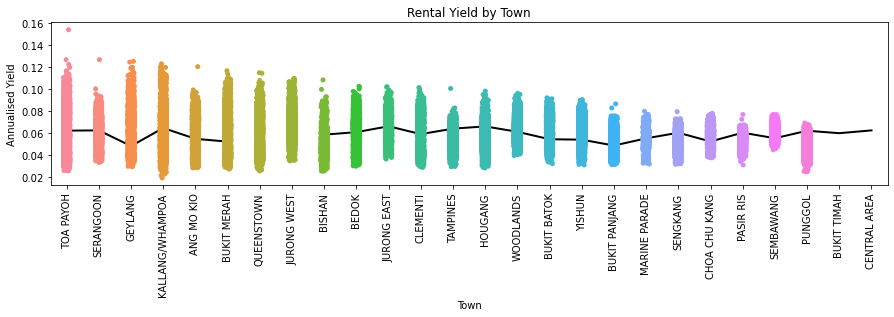

In [69]:
# annualised yield
fig, ax = plot.subplots(figsize=(15,3))

annual_yield_town = rent_resale_final.sort_values(by ='annualised_yield', ascending = False)

annual_yield_town.groupby(['town'])['annualised_yield'].mean().plot(ax=ax, color='black', linewidth=2)
sns.stripplot(x="town", y="annualised_yield", data=annual_yield_town, ax=ax)
for label in ax.get_xticklabels():
    label.set_rotation(90)
ax.set(ylabel ='Annualised Yield', xlabel='Town', title = 'Rental Yield by Town')


[Text(0, 0.5, 'Annualised Yield'),
 Text(0.5, 0, 'Town'),
 Text(0.5, 1.0, 'Rental Yield of 2 ROOM by Town')]

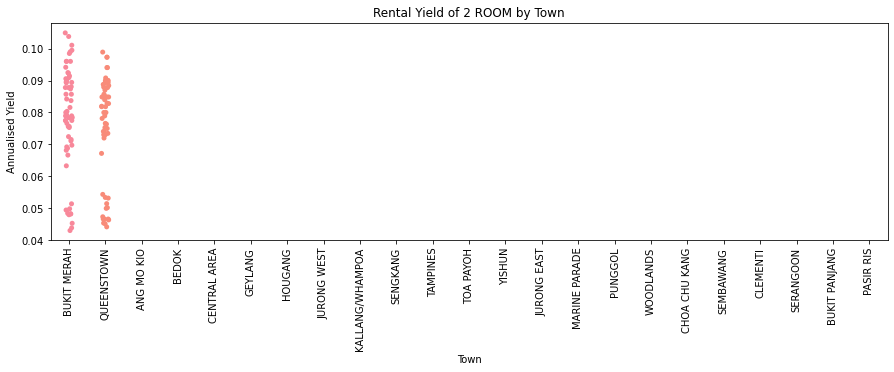

In [70]:
fig, ax = plot.subplots(figsize=(15,4))

annual_yield_town_2_room = annual_yield_town[annual_yield_town.flat_type == "2 ROOM"]
annual_yield_town_2_room.groupby(['town'])['annualised_yield'].mean().plot(ax=ax, color='black', linewidth=2)
sns.stripplot(x="town", y="annualised_yield", data=annual_yield_town_2_room, ax=ax)
for label in ax.get_xticklabels():
    label.set_rotation(90)
ax.set(ylabel ='Annualised Yield', xlabel='Town', title = 'Rental Yield of 2 ROOM by Town')



[Text(0, 0.5, 'Annualised Yield'),
 Text(0.5, 0, 'Town'),
 Text(0.5, 1.0, 'Rental Yield of 3 ROOM by Town')]

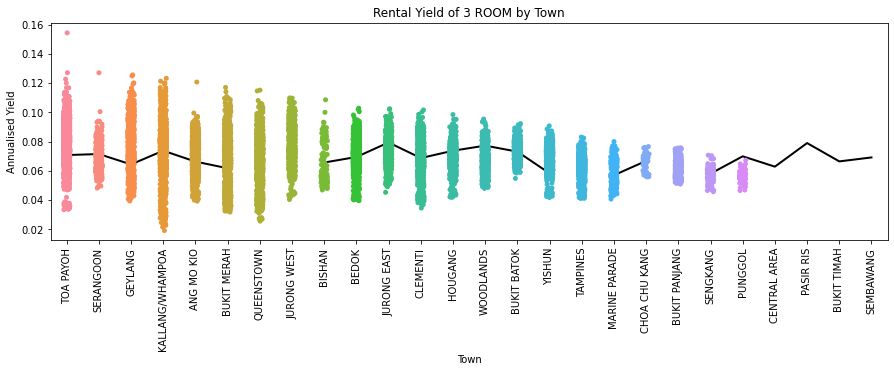

In [71]:
fig, ax = plot.subplots(figsize=(15,4))

annual_yield_town_3_room = annual_yield_town[annual_yield_town.flat_type == "3 ROOM"]
annual_yield_town_3_room.groupby(['town'])['annualised_yield'].mean().plot(ax=ax, color='black', linewidth=2)
sns.stripplot(x="town", y="annualised_yield", data=annual_yield_town_3_room, ax=ax)
for label in ax.get_xticklabels():
    label.set_rotation(90)
ax.set(ylabel ='Annualised Yield', xlabel='Town', title = 'Rental Yield of 3 ROOM by Town')



[Text(0, 0.5, 'Annualised Yield'),
 Text(0.5, 0, 'Town'),
 Text(0.5, 1.0, 'Rental Yield of 4 ROOM by Town')]

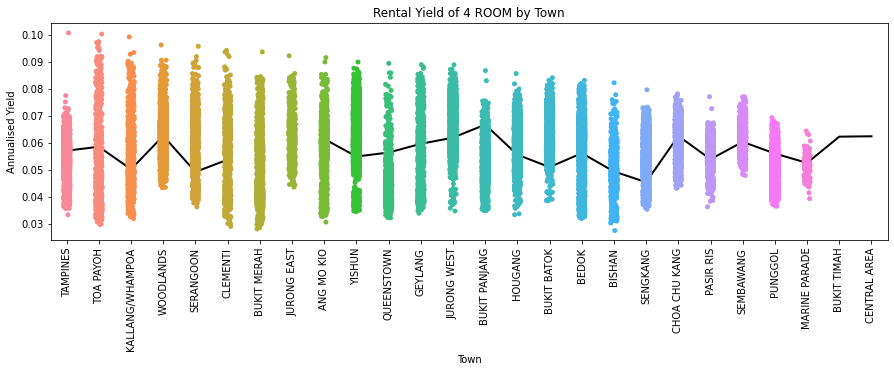

In [72]:
fig, ax = plot.subplots(figsize=(15,4))

annual_yield_town_4_room = annual_yield_town[annual_yield_town.flat_type == "4 ROOM"]
annual_yield_town_4_room.groupby(['town'])['annualised_yield'].mean().plot(ax=ax, color='black', linewidth=2)
sns.stripplot(x="town", y="annualised_yield", data=annual_yield_town_4_room, ax=ax)
for label in ax.get_xticklabels():
    label.set_rotation(90)
ax.set(ylabel ='Annualised Yield', xlabel='Town', title = 'Rental Yield of 4 ROOM by Town')



[Text(0, 0.5, 'Annualised Yield'),
 Text(0.5, 0, 'Town'),
 Text(0.5, 1.0, 'Rental Yield of 5 ROOM by Town')]

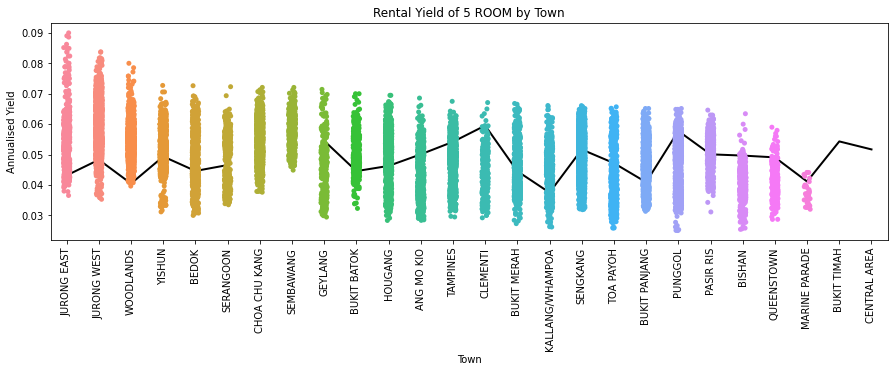

In [73]:
fig, ax = plot.subplots(figsize=(15,4))

annual_yield_town_5_room = annual_yield_town[annual_yield_town.flat_type == "5 ROOM"]
annual_yield_town_5_room.groupby(['town'])['annualised_yield'].mean().plot(ax=ax, color='black', linewidth=2)
sns.stripplot(x="town", y="annualised_yield", data=annual_yield_town_5_room, ax=ax)
for label in ax.get_xticklabels():
    label.set_rotation(90)
ax.set(ylabel ='Annualised Yield', xlabel='Town', title = 'Rental Yield of 5 ROOM by Town')



In [75]:
annual_yield_town_adjusted = annual_yield_town[annual_yield_town.flat_type != '1 ROOM']
annual_yield_town_adjusted = annual_yield_town_adjusted[annual_yield_town_adjusted.flat_type != '2 ROOM']
annual_yield_town_adjusted = annual_yield_town_adjusted[annual_yield_town_adjusted.flat_type != 'EXECUTIVE']
annual_yield_town_adjusted = annual_yield_town_adjusted[annual_yield_town_adjusted.flat_type != 'MULTI-GENERATION']

#remove those with insufficient data

[Text(0, 0.5, 'Annualised Yield'),
 Text(0.5, 0, 'Town'),
 Text(0.5, 1.0, 'Yield by Town')]

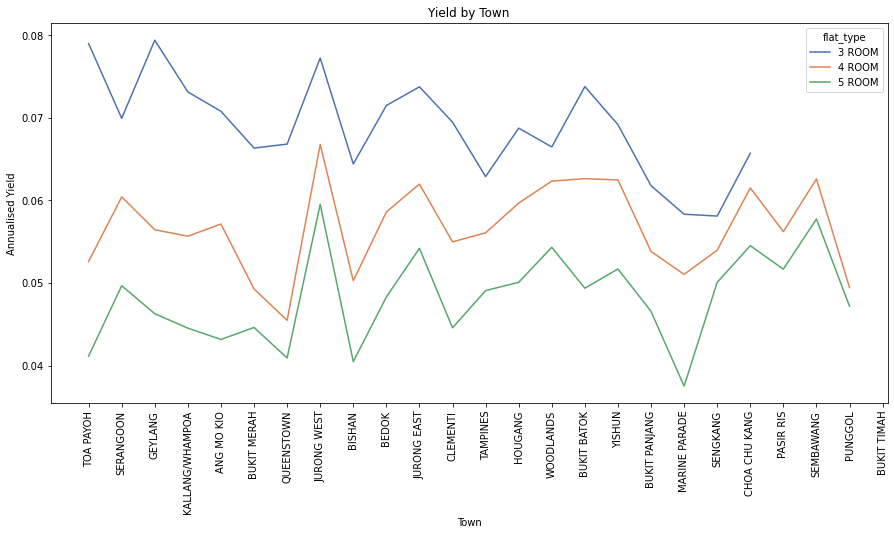

In [76]:
fig, ax = plot.subplots(figsize=(15,7))

annual_yield_town_adjusted.groupby(['town', 'flat_type'])['annualised_yield'].mean().reset_index()
sns.lineplot(x = 'town', y='annualised_yield', hue='flat_type', data=annual_yield_town_adjusted, palette='deep')
for label in ax.get_xticklabels():
    label.set_rotation(90)
ax.set(ylabel ='Annualised Yield', xlabel='Town', title = 'Yield by Town')

##### Lifetime Yield by town by flat type

[Text(0, 0.5, 'Lifetime Yield'),
 Text(0.5, 0, 'Town'),
 Text(0.5, 1.0, 'Lifetime Rental Yield by Town')]

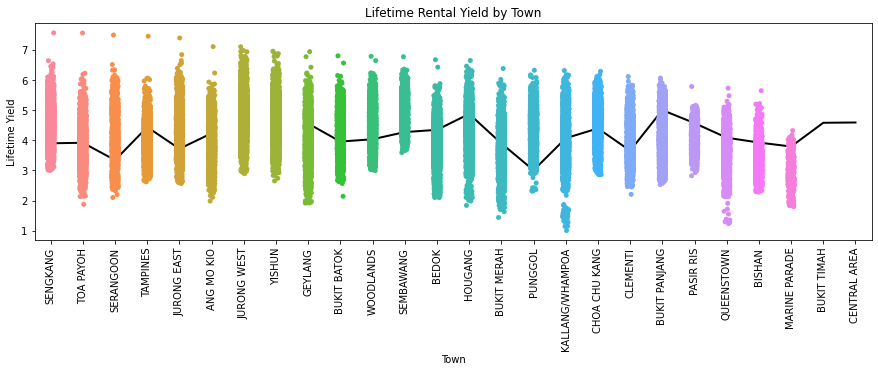

In [79]:
# using lifetime yield

fig, ax = plot.subplots(figsize=(15,4))

lifetime_yield_town = rent_resale_final.sort_values(by ='lifetime_yield', ascending = False)

lifetime_yield_town.groupby(['town'])['lifetime_yield'].mean().plot(ax=ax, color='black', linewidth=2)
sns.stripplot(x="town", y="lifetime_yield", data=lifetime_yield_town, ax=ax)
for label in ax.get_xticklabels():
    label.set_rotation(90)
ax.set(ylabel ='Lifetime Yield', xlabel='Town', title = 'Lifetime Rental Yield by Town')


[Text(0, 0.5, 'Lifetime Yield'),
 Text(0.5, 0, 'Town'),
 Text(0.5, 1.0, 'Lifetime Rental Yield of 2 ROOM by Town')]

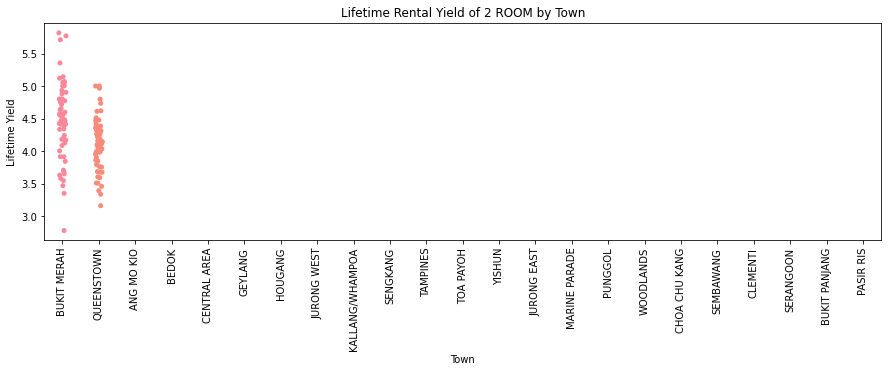

In [80]:
fig, ax = plot.subplots(figsize=(15,4))

lifetime_yield_town_2_room = lifetime_yield_town[lifetime_yield_town.flat_type == "2 ROOM"]
lifetime_yield_town_2_room.groupby(['town'])['lifetime_yield'].mean().plot(ax=ax, color='black', linewidth=2)
sns.stripplot(x="town", y="lifetime_yield", data=lifetime_yield_town_2_room, ax=ax)
for label in ax.get_xticklabels():
    label.set_rotation(90)
ax.set(ylabel ='Lifetime Yield', xlabel='Town', title = 'Lifetime Rental Yield of 2 ROOM by Town')



[Text(0, 0.5, 'Lifetime Yield'),
 Text(0.5, 0, 'Town'),
 Text(0.5, 1.0, 'Lifetime Rental Yield of 3 ROOM by Town')]

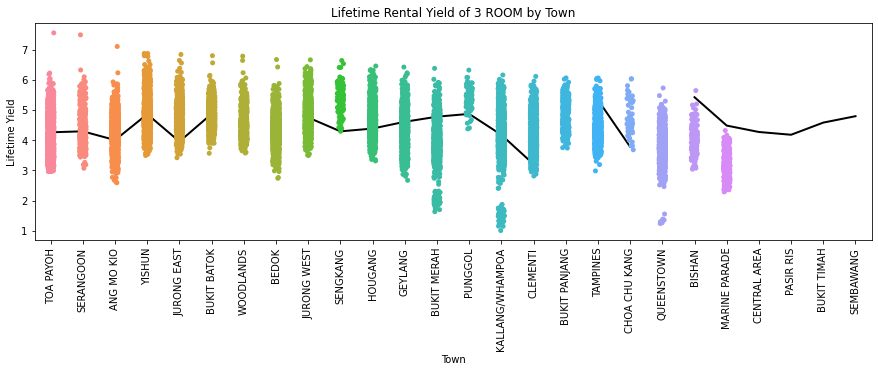

In [81]:
fig, ax = plot.subplots(figsize=(15,4))

lifetime_yield_town_3_room = lifetime_yield_town[lifetime_yield_town.flat_type == "3 ROOM"]
lifetime_yield_town_3_room.groupby(['town'])['lifetime_yield'].mean().plot(ax=ax, color='black', linewidth=2)
sns.stripplot(x="town", y="lifetime_yield", data=lifetime_yield_town_3_room, ax=ax)
for label in ax.get_xticklabels():
    label.set_rotation(90)
ax.set(ylabel ='Lifetime Yield', xlabel='Town', title = 'Lifetime Rental Yield of 3 ROOM by Town')



[Text(0, 0.5, 'Lifetime Yield'),
 Text(0.5, 0, 'Town'),
 Text(0.5, 1.0, 'Lifetime Rental Yield of 4 ROOM by Town')]

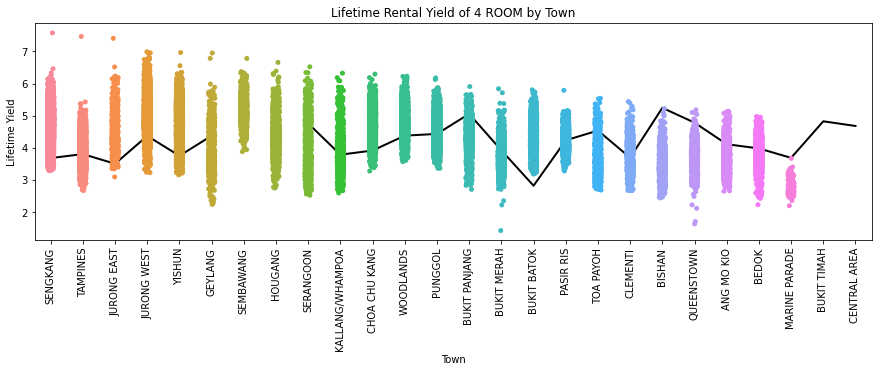

In [82]:
fig, ax = plot.subplots(figsize=(15,4))

lifetime_yield_town_4_room = lifetime_yield_town[lifetime_yield_town.flat_type == "4 ROOM"]
lifetime_yield_town_4_room.groupby(['town'])['lifetime_yield'].mean().plot(ax=ax, color='black', linewidth=2)
sns.stripplot(x="town", y="lifetime_yield", data=lifetime_yield_town_4_room, ax=ax)
for label in ax.get_xticklabels():
    label.set_rotation(90)
ax.set(ylabel ='Lifetime Yield', xlabel='Town', title = 'Lifetime Rental Yield of 4 ROOM by Town')


[Text(0, 0.5, 'Lifetime Yield'),
 Text(0.5, 0, 'Town'),
 Text(0.5, 1.0, 'Lifetime Rental Yield of 5 ROOM by Town')]

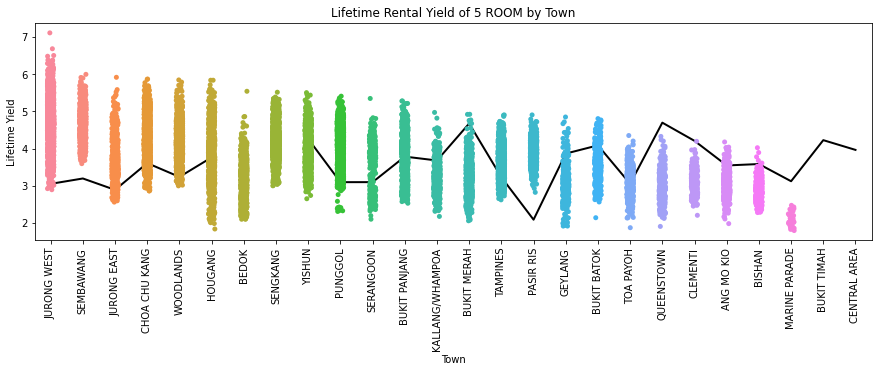

In [83]:
fig, ax = plot.subplots(figsize=(15,4))

lifetime_yield_town_5_room = lifetime_yield_town[lifetime_yield_town.flat_type == "5 ROOM"]
lifetime_yield_town_5_room.groupby(['town'])['lifetime_yield'].mean().plot(ax=ax, color='black', linewidth=2)
sns.stripplot(x="town", y="lifetime_yield", data=lifetime_yield_town_5_room, ax=ax)
for label in ax.get_xticklabels():
    label.set_rotation(90)
ax.set(ylabel ='Lifetime Yield', xlabel='Town', title = 'Lifetime Rental Yield of 5 ROOM by Town')



In [84]:
lifetime_yield_town_adjusted = lifetime_yield_town[lifetime_yield_town.flat_type != '1 ROOM']
lifetime_yield_town_adjusted = lifetime_yield_town_adjusted[lifetime_yield_town_adjusted.flat_type != '2 ROOM']
lifetime_yield_town_adjusted = lifetime_yield_town_adjusted[lifetime_yield_town_adjusted.flat_type != 'EXECUTIVE']
lifetime_yield_town_adjusted = lifetime_yield_town_adjusted[lifetime_yield_town_adjusted.flat_type != 'MULTI-GENERATION']

#remove those with insufficient data

[Text(0, 0.5, 'Lifetime Yield'),
 Text(0.5, 0, 'Town'),
 Text(0.5, 1.0, 'Lifetime Yield by Town')]

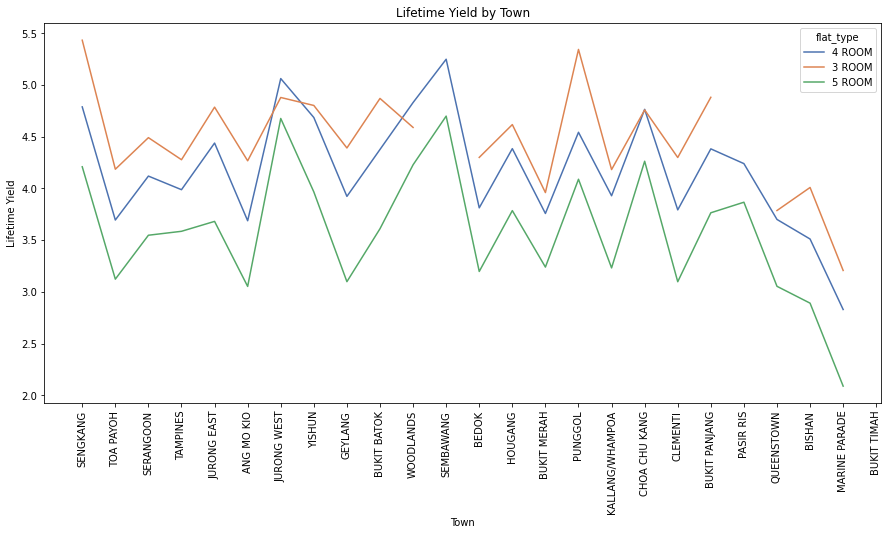

In [85]:
fig, ax = plot.subplots(figsize=(15,7))

lifetime_yield_town_adjusted.groupby(['town', 'flat_type'])['lifetime_yield'].mean().reset_index()
sns.lineplot(x = 'town', y='lifetime_yield', hue='flat_type', data=lifetime_yield_town_adjusted, palette='deep')
for label in ax.get_xticklabels():
    label.set_rotation(90)
ax.set(ylabel ='Lifetime Yield', xlabel='Town', title = 'Lifetime Yield by Town')

#### 7) Is the resale prices following the bala curve? (Proposal Question 4)

##### Introducing Bala Curve
<br>
when Singapore was still a British colony, the British Land office needed a way to work out the fees for renting of state land for a long period of time. 
<br>
<br>
At around that time a Land Office employee named Bala came up with a table (also called Bala’s Curve in graph form), which acted as a sort of guideline for the price renting out state land. Over time, Bala’s Table/Curve made its way to the real estate market in general
<br>
<br>
A fresh 99% lease will start at 96% of it's value and it drops to 80% when lease drops to 60 years remaining. At 30 years remaining lease, the value becomes 60%, at 15 years it becomes 40% and eventually dropping to 0%


<AxesSubplot:xlabel='Lease_in_months'>

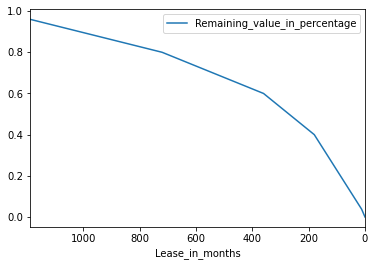

In [87]:
balacurvedata = {'Lease_in_months' : [1188,720,360,180,12,0],
                 'Remaining_value_in_percentage' : [0.96, 0.8, 0.6, 0.4, 0.038, 0]}

balacurveoverall = pd.DataFrame(balacurvedata)

balacurveoverall.plot(kind = 'line', x = 'Lease_in_months', y = 'Remaining_value_in_percentage', xlim=(1188,0))


In [88]:
balacurve = pd.read_csv("balacurve.csv")
balacurve.head()

,remaining_lease_in_months,percentage
0,1188,0.960000
1,1187,0.959658
2,1186,0.959316
3,1185,0.958974
4,1184,0.958632


In [89]:
rent_resale_final_add_bala = pd.merge(rent_resale_final, balacurve, how='left', on=['remaining_lease_in_months'])
rent_resale_final_add_bala

,year,quarters,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease_in_months,resale_price,median_rent,annualised_yield,lifetime_yield,lease_adjusted_annual_value,percentage
0,2017,1,ANG MO KIO,2 ROOM,10 TO 12,44.0,Improved,1979,733,232000.0,NaN,NaN,NaN,3798.09,0.804444
1,2017,1,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1978,721,250000.0,1750.0,0.084000,5.047000,4160.89,0.800342
2,2017,1,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1980,745,262000.0,1750.0,0.080153,4.976145,4220.13,0.808547
3,2017,1,ANG MO KIO,3 ROOM,04 TO 06,68.0,New Generation,1980,745,265000.0,1750.0,0.079245,4.919811,4268.46,0.808547
4,2017,1,ANG MO KIO,3 ROOM,01 TO 03,67.0,New Generation,1980,745,265000.0,1750.0,0.079245,4.919811,4268.46,0.808547
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90118,2021,1,YISHUN,EXECUTIVE,04 TO 06,146.0,Maisonette,1987,781,590000.0,NaN,NaN,NaN,9065.30,0.820855
90119,2021,1,YISHUN,EXECUTIVE,10 TO 12,146.0,Maisonette,1986,769,588000.0,NaN,NaN,NaN,9175.55,0.816752
90120,2021,1,YISHUN,EXECUTIVE,04 TO 06,142.0,Apartment,1988,792,670000.0,NaN,NaN,NaN,10151.52,0.824615
90121,2021,1,YISHUN,EXECUTIVE,07 TO 09,142.0,Apartment,1987,781,690000.0,NaN,NaN,NaN,10601.79,0.820855


In [92]:
#Removing outliers

rent_resale_bala_no_outlier = rent_resale_final_add_bala[rent_resale_final_add_bala.flat_model != "Premium Apartment"]
rent_resale_bala_no_outlier = rent_resale_bala_no_outlier[rent_resale_bala_no_outlier.flat_model != "Model A-Maisonette"]
rent_resale_bala_no_outlier = rent_resale_bala_no_outlier[rent_resale_bala_no_outlier.flat_model != "Maisonette"]
rent_resale_bala_no_outlier = rent_resale_bala_no_outlier[rent_resale_bala_no_outlier.flat_model != "Terrace"]
rent_resale_bala_no_outlier = rent_resale_bala_no_outlier[rent_resale_bala_no_outlier.flat_model != "Improved-Maisonette"]
rent_resale_bala_no_outlier = rent_resale_bala_no_outlier[rent_resale_bala_no_outlier.flat_model != "Premium Maisonette"]
rent_resale_bala_no_outlier = rent_resale_bala_no_outlier[rent_resale_bala_no_outlier.flat_model != "Multi Generation"]
rent_resale_bala_no_outlier = rent_resale_bala_no_outlier[rent_resale_bala_no_outlier.flat_model != "Premium Apartment Loft"]

Text(0.5, 1.0, '1 ROOM')

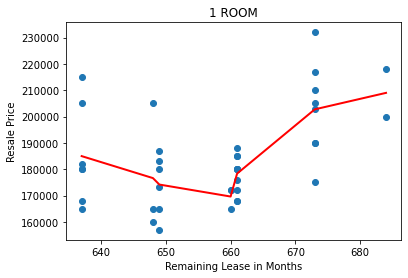

In [97]:
resale_lease_bala_1_room = rent_resale_bala_no_outlier[rent_resale_bala_no_outlier.flat_type == "1 ROOM"]
plot.scatter(x='remaining_lease_in_months', y='resale_price', data=resale_lease_bala_1_room)
resale_lease_bala_1_room.groupby(['remaining_lease_in_months'])['resale_price'].mean().plot(color='red', linewidth=2)
plot.xlabel('Remaining Lease in Months')
plot.ylabel('Resale Price')
plot.title('1 ROOM')


Text(0.5, 1.0, '2 ROOM')

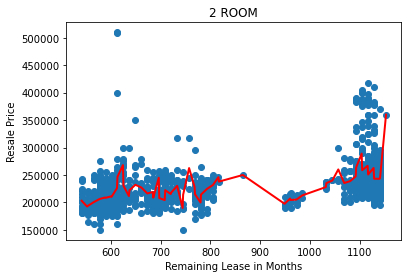

In [98]:
resale_lease_bala_2_room = rent_resale_bala_no_outlier[rent_resale_bala_no_outlier.flat_type == "2 ROOM"]
plot.scatter(x='remaining_lease_in_months', y='resale_price', data=resale_lease_bala_2_room)
resale_lease_bala_2_room.groupby(['remaining_lease_in_months'])['resale_price'].mean().plot(color='red', linewidth=2)
plot.xlabel('Remaining Lease in Months')
plot.ylabel('Resale Price')
plot.title('2 ROOM')


Text(0.5, 1.0, '3 ROOM')

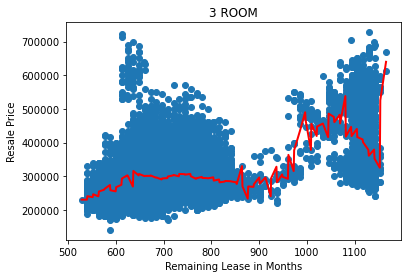

In [99]:
resale_lease_bala_3_room = rent_resale_bala_no_outlier[rent_resale_bala_no_outlier.flat_type == "3 ROOM"]
plot.scatter(x='remaining_lease_in_months', y='resale_price', data=resale_lease_bala_3_room)
resale_lease_bala_3_room.groupby(['remaining_lease_in_months'])['resale_price'].mean().plot(color='red', linewidth=2)
plot.xlabel('Remaining Lease in Months')
plot.ylabel('Resale Price')
plot.title('3 ROOM')


Text(0.5, 1.0, '4 ROOM')

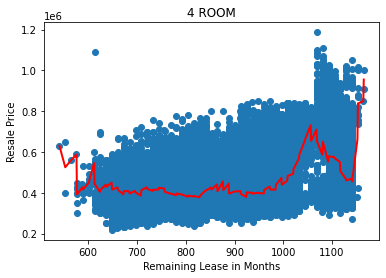

In [100]:
resale_lease_bala_4_room = rent_resale_bala_no_outlier[rent_resale_bala_no_outlier.flat_type == "4 ROOM"]
plot.scatter(x='remaining_lease_in_months', y='resale_price', data=resale_lease_bala_4_room)
resale_lease_bala_4_room.groupby(['remaining_lease_in_months'])['resale_price'].mean().plot(color='red', linewidth=2)
plot.xlabel('Remaining Lease in Months')
plot.ylabel('Resale Price')
plot.title('4 ROOM')


Text(0.5, 1.0, '5 ROOM')

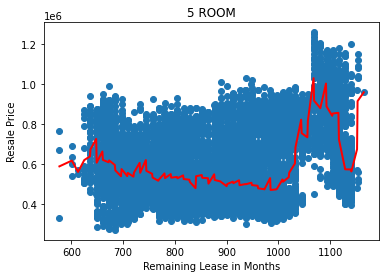

In [101]:
resale_lease_bala_5_room = rent_resale_bala_no_outlier[rent_resale_bala_no_outlier.flat_type == "5 ROOM"]
plot.scatter(x='remaining_lease_in_months', y='resale_price', data=resale_lease_bala_5_room)
resale_lease_bala_5_room.groupby(['remaining_lease_in_months'])['resale_price'].mean().plot(color='red', linewidth=2)
plot.xlabel('Remaining Lease in Months')
plot.ylabel('Resale Price')
plot.title('5 ROOM')


#### 8) Is there any strong corelation between the attributes?

In [102]:
rent_resale_bala_no_outlier.corr()

,year,quarters,floor_area_sqm,lease_commence_date,remaining_lease_in_months,resale_price,median_rent,annualised_yield,lifetime_yield,lease_adjusted_annual_value,percentage
year,1.000000,-0.051601,0.000140,0.112509,0.025351,0.017718,-0.009027,-0.007314,-0.012465,0.014671,0.016530
quarters,-0.051601,1.000000,0.002225,0.018949,0.002109,0.006512,0.011643,-0.019096,-0.024788,0.007078,0.000016
floor_area_sqm,0.000140,0.002225,1.000000,0.229237,0.231917,0.613392,0.532664,-0.588329,-0.338545,0.554139,0.254848
lease_commence_date,0.112509,0.018949,0.229237,1.000000,0.995453,0.378223,0.100254,-0.616047,0.230933,-0.111519,0.990548
remaining_lease_in_months,0.025351,0.002109,0.231917,0.995453,1.000000,0.378536,0.101242,-0.618984,0.234969,-0.114349,0.996209
resale_price,0.017718,0.006512,0.613392,0.378223,0.378536,1.000000,0.788420,-0.856119,-0.652513,0.860790,0.381530
median_rent,-0.009027,0.011643,0.532664,0.100254,0.101242,0.788420,1.000000,-0.470451,-0.492129,0.822871,0.101259
annualised_yield,-0.007314,-0.019096,-0.588329,-0.616047,-0.618984,-0.856119,-0.470451,1.000000,0.594765,-0.617198,-0.629208
lifetime_yield,-0.012465,-0.024788,-0.338545,0.230933,0.234969,-0.652513,-0.492129,0.594765,1.000000,-0.860466,0.231206
lease_adjusted_annual_value,0.014671,0.007078,0.554139,-0.111519,-0.114349,0.860790,0.822871,-0.617198,-0.860466,1.000000,-0.109767


## Section 3 - Conclusion and recommendation

- High priced flats doesn’t guarantee high yet
- 3-room and 4-romm gives the best returns
- Based off lifetime yield, you can 4x-5x your money if you rent out the flat for the entire duration of the lease
- Buy 3-room with 80 years lease or 4-room with 85-years lease as the price flats out till 50-years.Effectively giving you some significant extra years
- Jurong West and Sembawang gives the best lifetime yield, followed by Sengkang and Punggol, then Chua Chu Kang